# **Project Name**    - Credit Card Default Prediction



##### **Project Type**    - Classification 
##### **Contribution**    - Individual
##### **Name - SHEIKH MOSTAQUL ARIF**     

# **Project Summary -**

The aim of this project was to conduct an Explanatory Data Analysis (EDA) on a dataset related to credit card default payments in Taiwan. The objective was to explore the data and gain insights that could help predict the probability of default payments, with a focus on estimating the probability rather than a binary classification.

The dataset contained various features including customer demographics, credit card details, and payment history. The columns included ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0 to PAY_6 (representing payment status over the last six months), BILL_AMT1 to BILL_AMT6 (representing bill statement amounts), PAY_AMT1 to PAY_AMT6 (representing payment amounts), and the target variable, default payment next month.

In conclusion, this EDA project provided valuable insights into the credit card default payment dataset from Taiwan. By exploring the data and understanding the relationships between variables, it is possible to predict the probability of default payments more accurately. The findings from this analysis can be used to develop models and strategies for risk management in the credit card industry, assisting in mitigating financial losses and making more informed decisions.

# **GitHub Link -**

https://github.com/Mostaqul143/Credit-Card-Default_Prediction

# **Problem Statement**


Problem Statement:

**The problem at hand is to predict the probability of default payments for credit card customers in Taiwan.**

**The focus is on estimating the probability rather than a binary classification of credible or not credible clients.**

**Risk management is crucial for credit card companies, and accurate prediction of default payments can help mitigate financial losses.**

**The dataset consists of various features such as customer demographics, credit card details, and payment history.**

**The goal is to conduct an Explanatory Data Analysis (EDA) to gain insights into the dataset and identify patterns that can aid in predicting default payments.**

**Key questions to address include understanding the relationship between variables, identifying significant predictors, and exploring any notable trends or outliers.**

**The outcome of the EDA will inform the development of models and strategies for risk management in the credit card industry.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

### Dataset Loading

In [2]:
# Load Dataset

df=pd.read_excel('credit.xls')

### Dataset First View

In [3]:
# Dataset First Look

df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

print(f"Number Of Rows {df.shape[0]}")
print(f"Number Of Columns {df.shape[1]}")

Number Of Rows 30000
Number Of Columns 25


### Dataset Information

In [5]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count

num_duplicates = df.duplicated().sum()
print(f"Number of Duplicate Values: {num_duplicates}")

Number of Duplicate Values: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count

num_missing = df.isnull().sum()
print("Number of Missing Values:\n", num_missing)

Number of Missing Values:
 ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


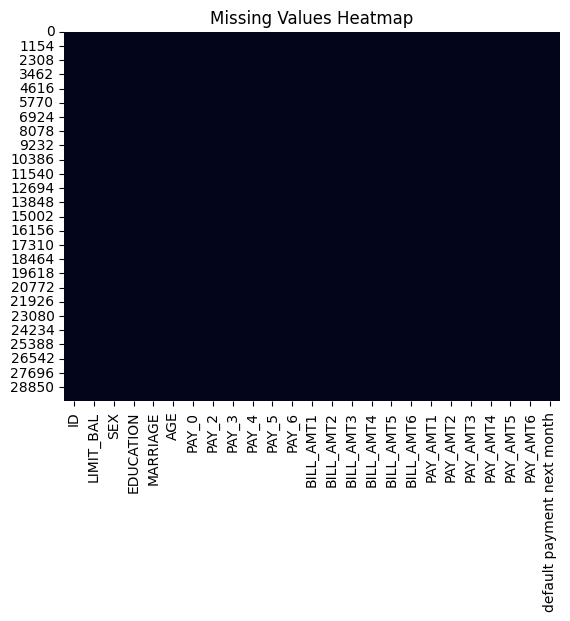

In [8]:
# Visualizing the missing values

sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

**There are  30000 Number of  Rows and 25 Numbers of Columns Present in my dataset.**

**There are 25 Numerical Columns and 0 Categorical Columns Present in my Dataset** 

**There are No Missing Values in my Dataset.**

**There are No Duplicate Values in my  Dataset.**

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns

df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
# Dataset Describe

df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


### Variables Description 

**ID:** Unique identifier for each customer.

**LIMIT_BAL:** Credit card limit in Taiwanese dollars, representing the maximum amount a customer can borrow.

**SEX:** Gender of the customer. 1 represents male, and 2 represents female.

**EDUCATION:** Level of education attained by the customer. The categories are as follows:

1: Graduate school

2: University

3: High school

4: Others


**MARRIAGE:** Marital status of the customer. The categories are as follows:

1: Married

2: Single

3: Others

**AGE:** Age of the customer in years.

**PAY_0 to PAY_6:** Payment status of the customer for the last six months. Each column represents a different month, with the following categories:

-2: No consumption

-1: Paid in full

0: Use of revolving credit

1: Payment delay for one month

2: Payment delay for two months

And so on...

**BILL_AMT1 to BILL_AMT6:** Amount of bill statement for the last six months in Taiwanese dollars.

**PAY_AMT1 to PAY_AMT6:** Amount of payment made for the last six months in Taiwanese dollars.

**default payment next month:** The target variable indicating whether the customer defaulted on their credit card payment the following month.

0: Not defaulted

1: Defaulted

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.

for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),"." ) 

No. of unique values in  ID is 30000 .
No. of unique values in  LIMIT_BAL is 81 .
No. of unique values in  SEX is 2 .
No. of unique values in  EDUCATION is 7 .
No. of unique values in  MARRIAGE is 4 .
No. of unique values in  AGE is 56 .
No. of unique values in  PAY_0 is 11 .
No. of unique values in  PAY_2 is 11 .
No. of unique values in  PAY_3 is 11 .
No. of unique values in  PAY_4 is 11 .
No. of unique values in  PAY_5 is 10 .
No. of unique values in  PAY_6 is 10 .
No. of unique values in  BILL_AMT1 is 22723 .
No. of unique values in  BILL_AMT2 is 22346 .
No. of unique values in  BILL_AMT3 is 22026 .
No. of unique values in  BILL_AMT4 is 21548 .
No. of unique values in  BILL_AMT5 is 21010 .
No. of unique values in  BILL_AMT6 is 20604 .
No. of unique values in  PAY_AMT1 is 7943 .
No. of unique values in  PAY_AMT2 is 7899 .
No. of unique values in  PAY_AMT3 is 7518 .
No. of unique values in  PAY_AMT4 is 6937 .
No. of unique values in  PAY_AMT5 is 6897 .
No. of unique values in  PAY_AMT

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.


#Rename The Columns for better convinience

df.rename(columns={'default payment next month' : 'Defaulted','PAY_0': 'PAY_1'}, inplace=True)

In [13]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
''' EDUCATION column:  5 and 6 are both recorded as 'unknown' and there is 0 which isn't explained in the dataset description. 
Since the amounts are so small, let's combine 0,4,5,6 to 0 which means "other" '''


df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
0      468
Name: count, dtype: int64

In [15]:
# From dataset description: MARRIAGE: Marital status (1=Married, 2=Single, 3=Others), but there is also 0

df["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

In [16]:
#ValueCounts Of Marriage

df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [17]:
# Number Of customers had "MARRIAGE" status as 0?

df["MARRIAGE"].value_counts(normalize=True)

MARRIAGE
2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: proportion, dtype: float64

In [18]:
#Since there are only 0.18% (or 54) observations of 0, We will combine 0 and 3 in one value as 'others'

# Combine 0 and 3 by changing the value 0 into others

df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

MARRIAGE
2    0.532133
1    0.455300
3    0.012567
Name: proportion, dtype: float64

### What all manipulations have you done and insights you found?

**I Rename The Columns 'default payment next month' To 'Defaulted' And 'PAY_0' To 'PAY_1'**


**EDUCATION column:  5 and 6 are both recorded as 'unknown' and there is 0 which isn't explained in the dataset description. Since the amounts are so small, let's combine 0,4,5,6 to 0 which means "other"**

**There are only 0.18% (or 54) observations of 0 So,We will combine 0 and 3 in one value as 'others'**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [19]:
# counts the dependent variable data set

df['Defaulted'].value_counts()

Defaulted
0    23364
1     6636
Name: count, dtype: int64

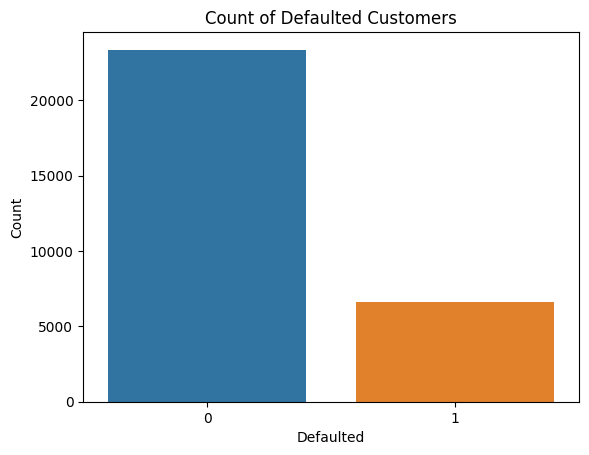

In [20]:
# Chart - 1 visualization code

#plotting the count plot to vizualize the data distribution 


# Plot countplot
sns.countplot(data=df, x='Defaulted')

# Set labels and title
plt.xlabel('Defaulted')
plt.ylabel('Count')
plt.title('Count of Defaulted Customers')

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

I selected the countplot chart for visualizing the distribution of the 'Defaulted' variable because it is a categorical variable with two possible values: 0 (not defaulted) and 1 (defaulted).

A countplot is an appropriate choice for this type of data because it shows the frequency or count of each category in a bar chart format. It allows us to easily compare the number of defaulted and non-defaulted customers.

##### 2. What is/are the insight(s) found from the chart?

**From the above data analysis we can say that**
*   **0 - Not Default**
*   **1 - Default**
*   **Defaulters are less than the Non Defaulters in the given dataset.**

#### Chart - 2

In [21]:
# counts the SEX variable data set
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

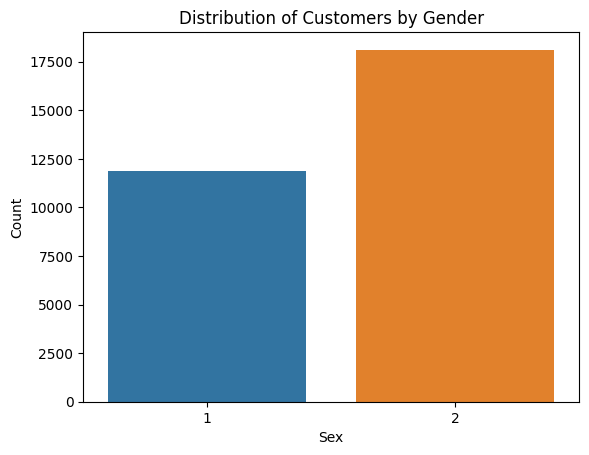

In [22]:
# Chart - 2 visualization code

# Plot countplot
sns.countplot(data=df, x='SEX')

# Set labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Customers by Gender')

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

I selected the countplot chart to visualize the distribution of customers based on their gender because the 'Sex' column is a categorical variable with two distinct categories: 1 for male and 2 for female.

##### 2. What is/are the insight(s) found from the chart?

**From the above data analysis we can say that**
*   **1 - Male**
*   **2 - Female**
*   ***Number of Male credit holder is less than Female.***

#### Chart - 3

In [23]:
# counts the education  data set variable data set
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
0      468
Name: count, dtype: int64

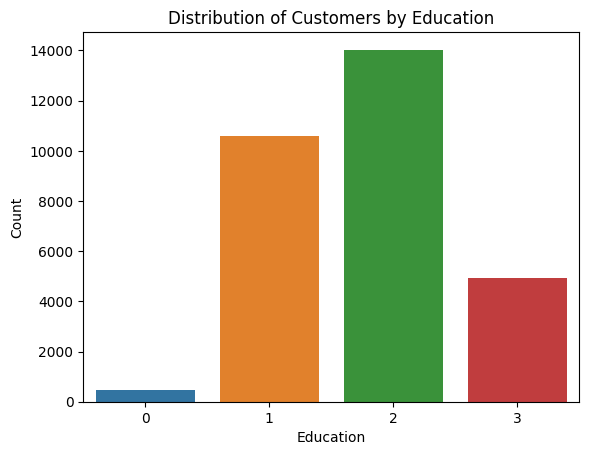

In [24]:
# Chart - 3 visualization code

# Plot countplot
sns.countplot(data=df, x='EDUCATION')

# Set labels and title
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Customers by Education')

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

I selected the countplot chart to visualize the distribution of customers based on their education categories because the 'EDUCATION' column consists of discrete categorical values.

##### 2. What is/are the insight(s) found from the chart?


 **1 = Graduate school** 
 
 **2 = University** 
 
 **3 = High school** 
 
 **0 = Others**



**From the above data analysis we can say that**
*   ***More number of credit holders are university students followed by Graduates and then High school students.***

#### Chart - 4

In [25]:
#Value_Counts Of MARRIAGE

df["MARRIAGE"].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

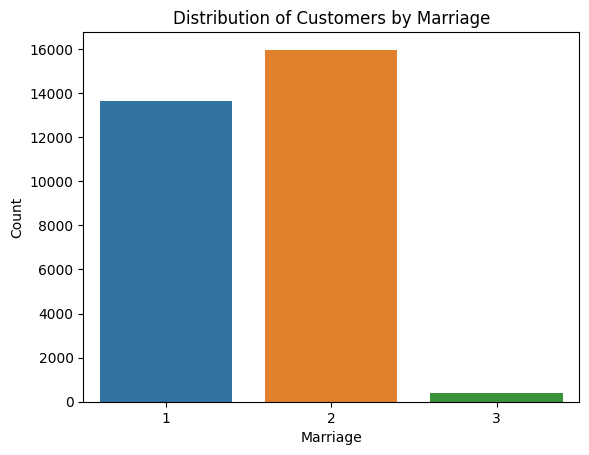

In [26]:
# Chart - 4 visualization code

# Plot countplot
sns.countplot(data=df, x='MARRIAGE')

# Set labels and title
plt.xlabel('Marriage')
plt.ylabel('Count')
plt.title('Distribution of Customers by Marriage')

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

I selected the countplot chart to visualize the distribution of customers based on their marriage categories because the 'MARRIAGE' column consists of discrete categorical values.

##### 2. What is/are the insight(s) found from the chart?

**From the above data analysis we can say that**
*   **1 - Married**
*   **2 - Single**
*   **3 - Others**

*   ***More number of credit cards holder are Single.***

#### Chart - 5

In [27]:
# counts the Age  data set


df['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

In [28]:
#Check the mean of the age group rescpective to the Defaulted (Dependent Column)

df.groupby('Defaulted')['AGE'].mean()

Defaulted
0    35.417266
1    35.725738
Name: AGE, dtype: float64

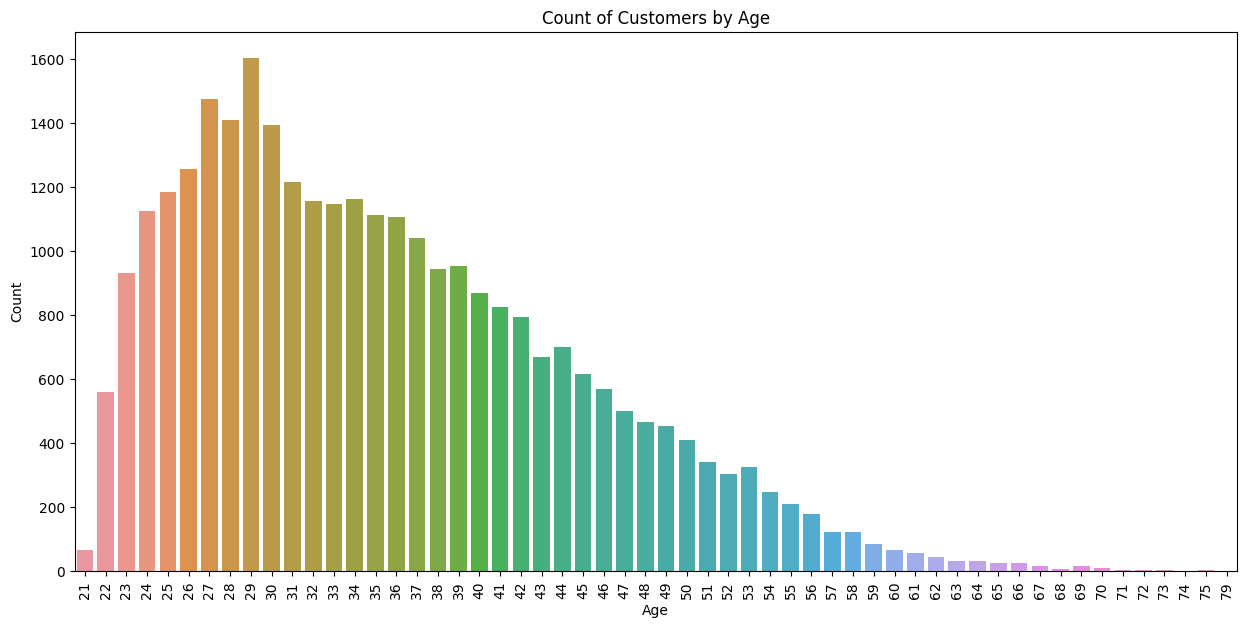

In [29]:
# Chart - 5 visualization code

# Plot countplot
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='AGE')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Customers by Age')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

I selected the countplot chart to visualize the distribution of customers based on their age because the 'AGE' column consists of discrete numerical values representing different age groups.

##### 2. What is/are the insight(s) found from the chart?

**From the above data analysis we can say that**




*  ***We can see more number of credit cards holder age are between 26-30 years old.***

*  ***Age above 60 years old rarely uses the credit card.***

#### Chart - 6 - Correlation Heatmap

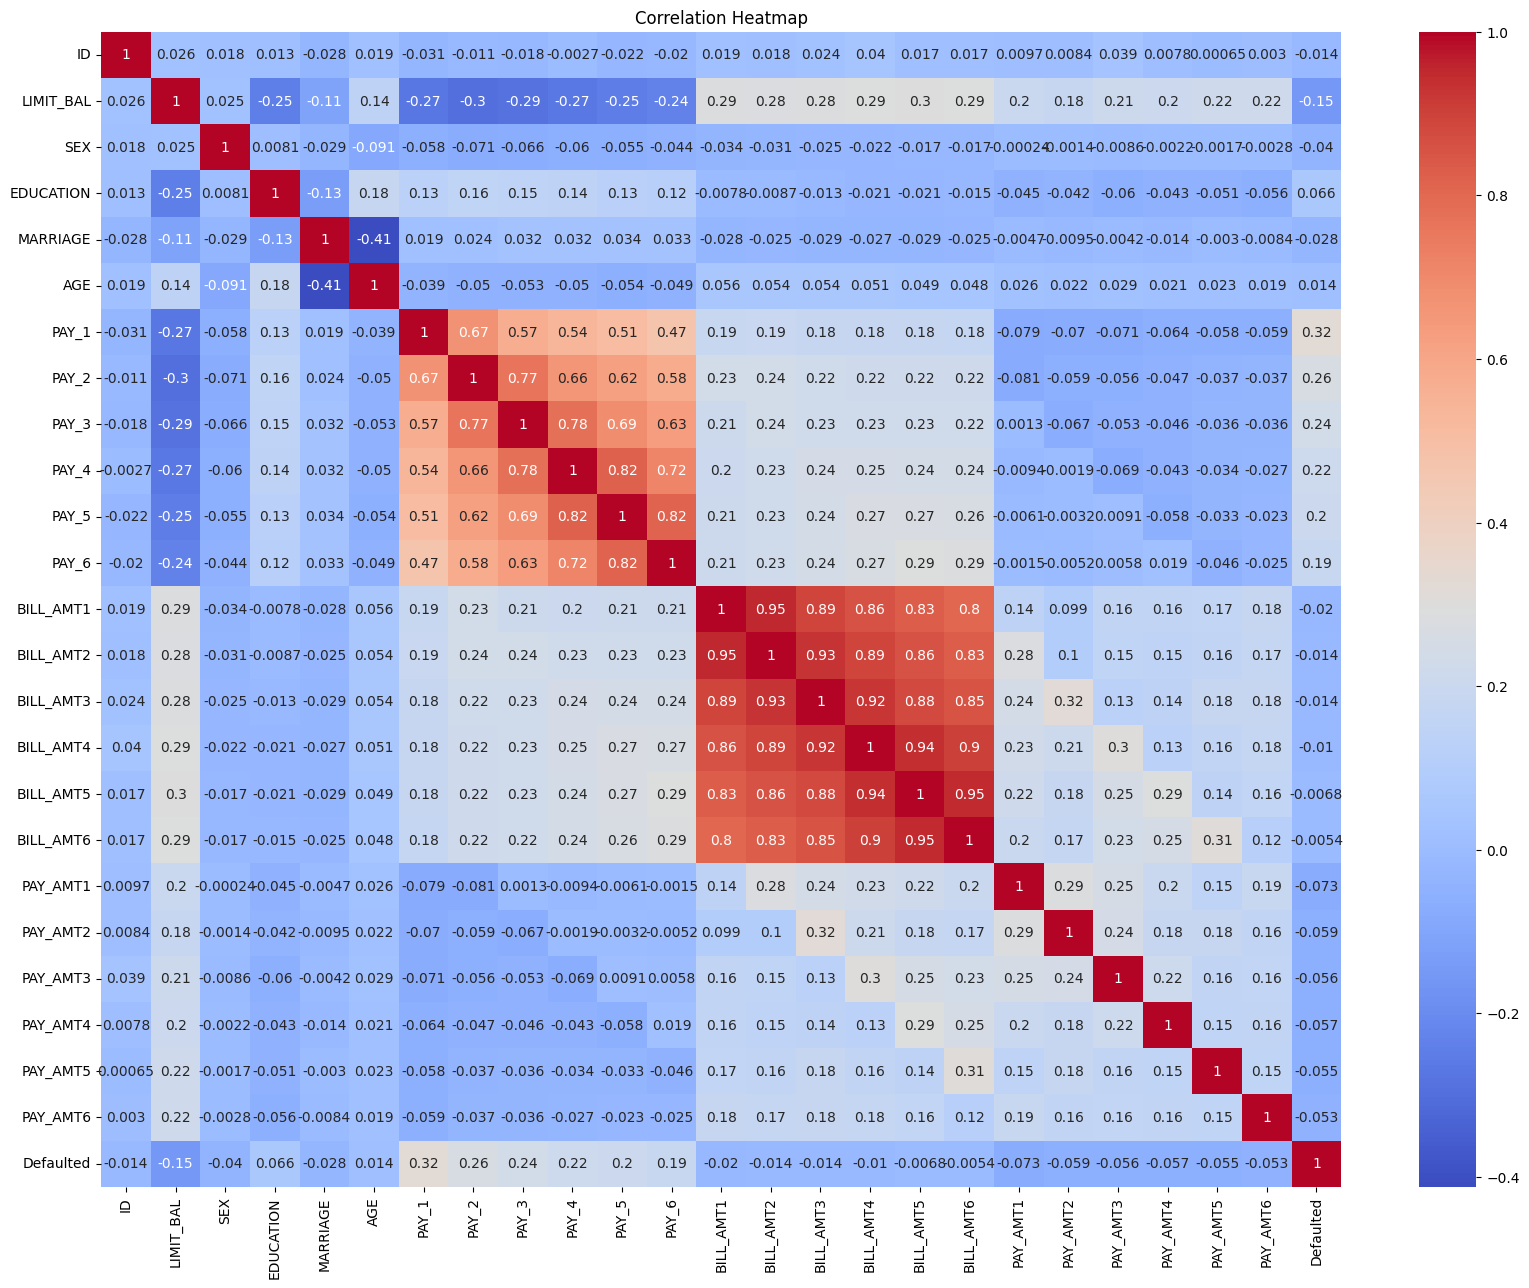

In [30]:
# Correlation Heatmap visualization code


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

I chose to use a correlation heatmap for visualizing the correlation matrix because it provides a clear and intuitive representation of the relationships between variables in the dataset

##### 2. What is/are the insight(s) found from the chart?

* ***It seems from the above graph is there are some negatively correlated feature like age but we cannot blindly remove this feature because it could be important feature for prediction.*** 

* ***ID is unimportant and it has no role in prediction so we will remove it.***

#### Chart - 7 - Pair Plot 

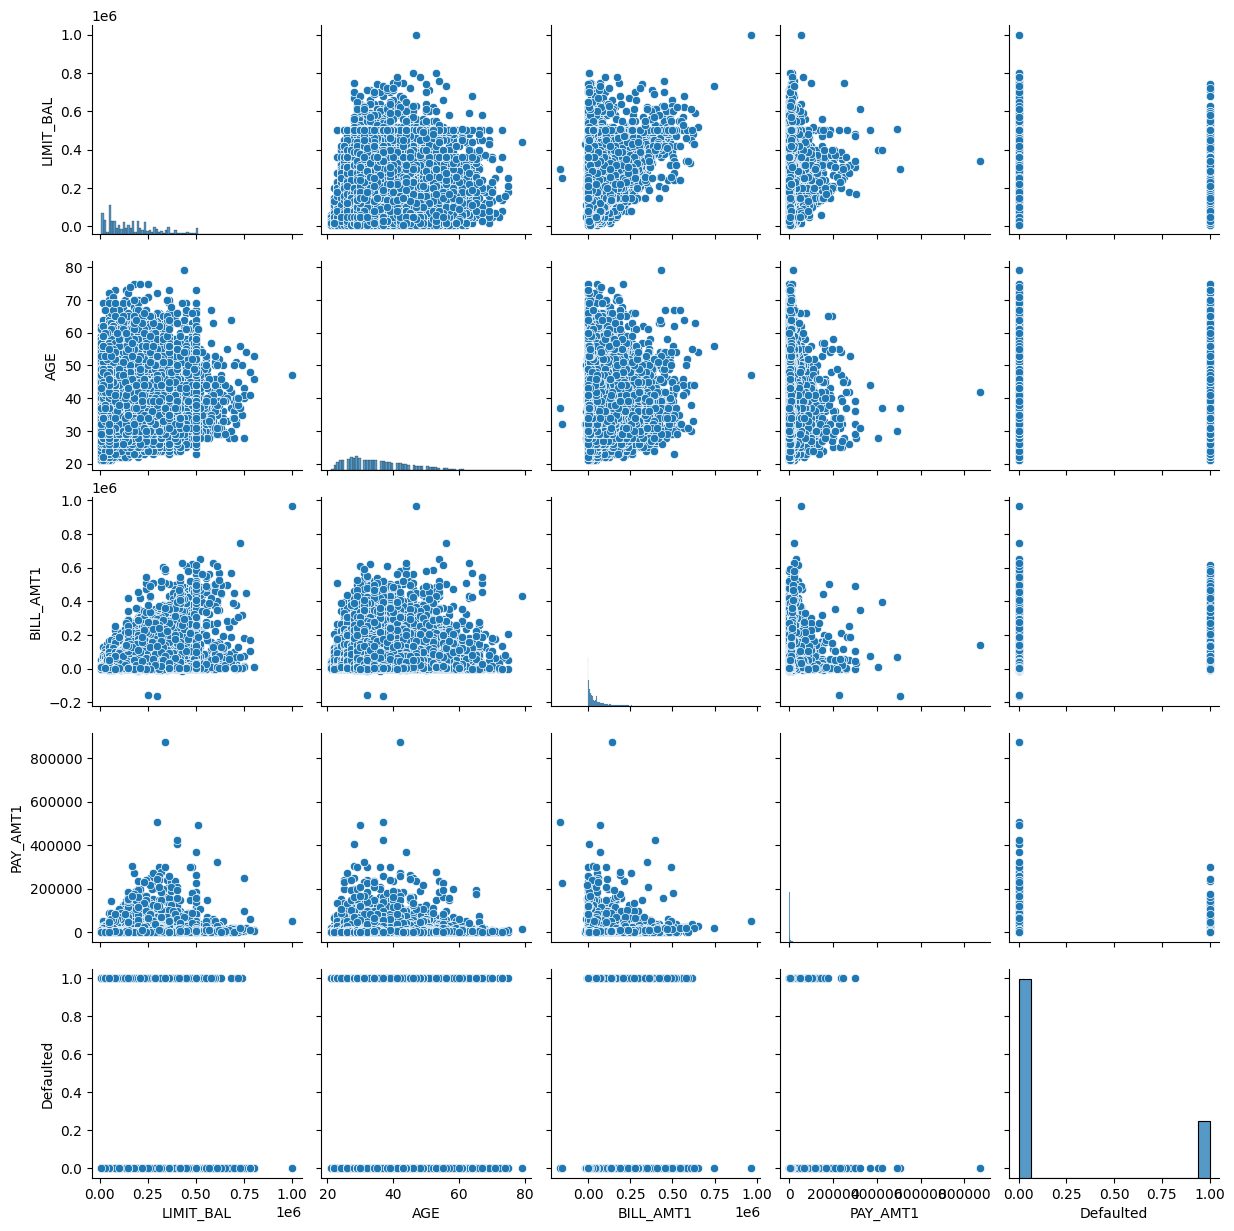

In [31]:
# Pair Plot visualization code

# Select columns for pair plot
columns = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1', 'Defaulted']

# Create a pair plot
sns.pairplot(df[columns])

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?


The pair plot is a suitable choice for visualizing the relationships between multiple variables in your dataset

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Statement 1:** The proportion of defaulted customers is higher among individuals with lower education levels compared to those with higher education levels.

**Statement 2:** There is a significant difference in the distribution of customers by gender.

**Statement 3:** The proportion of defaulted customers varies significantly across different age groups.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



**Null Hypothesis (H0):** The proportion of defaulted customers is the same across different education levels.

**Alternate Hypothesis (Ha):** The proportion of defaulted customers is higher among individuals with lower education levels compared to those with higher education levels.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

# Define the significance level
alpha = 0.05

# Create a contingency table of education level and defaulted status
contingency_table = pd.crosstab(df['EDUCATION'], df['Defaulted'])

# Perform chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the p-value
print("P-value:", p_value)

P-value: 1.4950645648106153e-34


In [33]:
# Check if any of the p-values are less than the significance level

if (p_value < alpha ):
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

I have performed Chi-Square test to obtain the p-value

##### Why did you choose the specific statistical test?

I chose the chi-square test of independence because it is appropriate for analyzing the association between two categorical variables, such as education level (with multiple categories) and the proportion of defaulted customers.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


**Null Hypothesis (H0):** There is no significant difference in the distribution of customers by gender.

**Alternate Hypothesis (Ha):** There is a significant difference in the distribution of customers by gender.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value

import statsmodels.api as sm

# Separate the dataset into two groups based on gender
male_customers = df[df['SEX'] == 1]['Defaulted']
female_customers = df[df['SEX'] == 2]['Defaulted']

# Perform two-sample proportion z-test
z_statistic, p_value = sm.stats.proportions_ztest([male_customers.sum(), female_customers.sum()],
                                                  [len(male_customers), len(female_customers)])

# Print the p-value
print("P-value:", p_value)


P-value: 4.472804335814144e-12


In [35]:
# Check if any of the p-values are less than the significance level

if (p_value < alpha ):
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

I have performed Z-test to obtain the p-value

##### Why did you choose the specific statistical test?

I chose the Z test of independence because it is appropriate for analyzing the association between two categorical variables, such as Gender  and the proportion of defaulted customers.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** The proportion of defaulted customers is the same across different age groups.

**Alternate Hypothesis (H1):** The proportion of defaulted customers varies significantly across different age groups.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value

# Create a contingency table of age group and defaulted
contingency_table = pd.crosstab(df['AGE'], df['Defaulted'])

# Perform chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the p-value
print("P-value:", p_value)

P-value: 5.6429915495725416e-12


In [37]:
# Check if any of the p-values are less than the significance level

if (p_value < alpha ):
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

I have performed Chi-Square test to obtain the p-value

##### Why did you choose the specific statistical test?

The chi-square test of independence is commonly used when dealing with categorical variables and examining the association or relationship between them. In this case, we have the categorical variable "Age_Group" (representing different age groups) and the binary variable "Defaulted" (indicating whether a customer has defaulted or not).

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [38]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Unfortunately, There are no missing values in my dataset

### 2. Handling Outliers

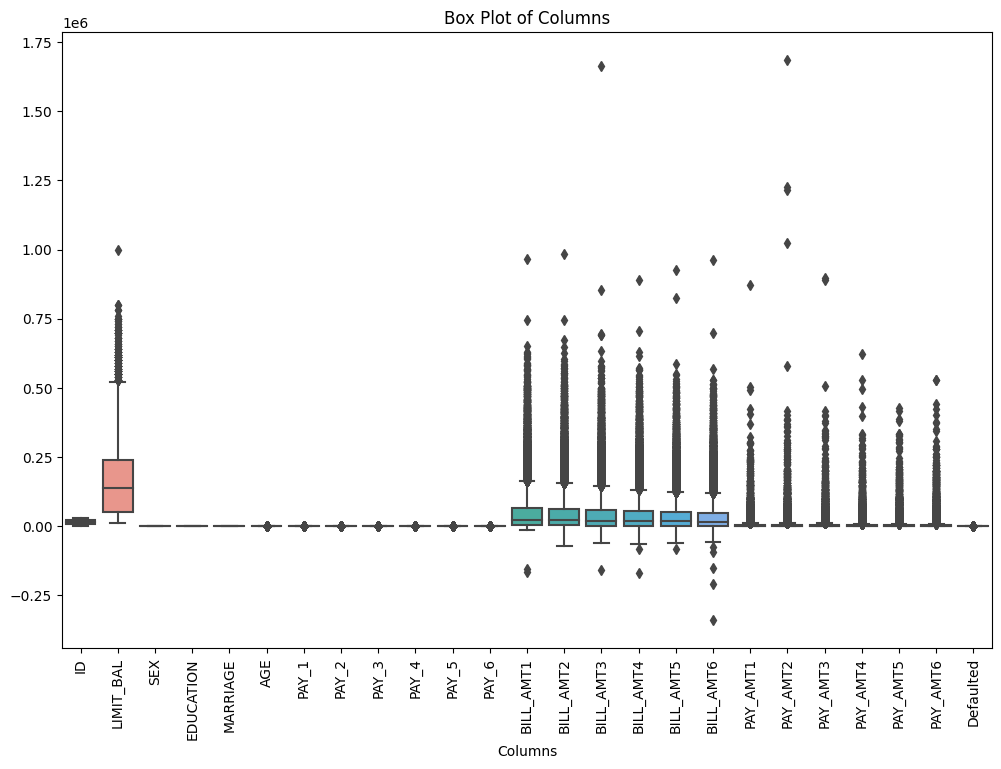

In [39]:
# Handling Outliers & Outlier treatments

# Create box plots for each column
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)

# Set title and labels
plt.title('Box Plot of Columns')
plt.xlabel('Columns')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

As You can see there are Outliers in my columns. but i can not blindly remove the outliers as it may be important for us. So i dont Remove Them

### 3. Categorical Encoding

In [40]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

It is Alredy Encoded

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [41]:
# Expand Contraction

#### 2. Lower Casing

In [42]:
# Lower Casing

#### 3. Removing Punctuations

In [43]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [44]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [45]:
# Remove Stopwords

In [46]:
# Remove White spaces

#### 6. Rephrase Text

In [47]:
# Rephrase Text

#### 7. Tokenization

In [48]:
# Tokenization

#### 8. Text Normalization

In [49]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [50]:
# POS Taging

#### 10. Text Vectorization

In [51]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [52]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [53]:
# Select your features wisely to avoid overfitting


#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [54]:
calc_vif(df[[i for i in df.describe().columns if i not in ['ID']]])

,variables,VIF
0,LIMIT_BAL,4.035758
1,SEX,9.125848
2,EDUCATION,7.307146
3,MARRIAGE,6.375795
4,AGE,11.345358
5,PAY_1,1.996501
6,PAY_2,3.216996
7,PAY_3,3.729784
8,PAY_4,4.440378
9,PAY_5,4.985797


In [55]:
df.drop(['ID'],axis=1,inplace=True)

In [56]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulted
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


##### What all feature selection methods have you used  and why?

Variance Inflation Factor (VIF) is a feature selection method that assesses the multicollinearity among independent variables in a regression model. It calculates a numerical value for each feature, indicating how much the variance of the estimated regression coefficient is increased due to collinearity. Features with high VIF values indicate high multicollinearity and may need to be removed.

##### Which all features you found important and why?

After performing feature selection using the VIF method, the following 24 features have been identified as important:

**LIMIT_BAL**

**SEX**

**EDUCATION**

**MARRIAGE**

**AGE**

**PAY_1**

**PAY_2**

**PAY_3**

**PAY_4**

**PAY_5**

**PAY_6**

**BILL_AMT1**

**BILL_AMT2**

**BILL_AMT3**

**BILL_AMT4**

**BILL_AMT5**

**BILL_AMT6**

**PAY_AMT1**

**PAY_AMT3**

**PAY_AMT4**

**PAY_AMT5**

**PAY_AMT6**

**Defaulted**

These features have been determined to be important based on their individual contributions and correlations with the dependent variable or target variable, which in this case is 'Defaulted'. They represent various attributes related to credit card usage, payment history, bill amounts, and demographic information of the customers.

These selected features can be used in further analysis or modeling to develop predictive models or gain insights into the factors influencing the default payments of customers.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

I dont Performed Any Transformation

### 3. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [57]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [58]:
X = df.drop(['Defaulted'],axis=1)
y = df['Defaulted']

In [59]:
# Split your data to train and test. Choose Splitting ratio wisely.


# Split your data to train and test. Choose Splitting ratio wisely.

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2023)

print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (24000, 23)
Shape of X_test (6000, 23)
Shape of y_train (24000,)
Shape of y_test (6000,)


##### What data splitting ratio have you used and why? 

The data splitting ratio used in this code is 80% for training data and 20% for testing data. 
This is specified by the parameter test_size=0.2 in the train_test_split() function.

### 6. Data Scaling

In [60]:
# Scaling your data

sc=StandardScaler()
sc.fit(X_train)

X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)

In [61]:
X_train_scaled,y_train

(array([[-0.21097119,  0.80949773,  0.29899191, ..., -0.30642631,
          0.02014476, -0.18397243],
        [-0.90419138, -1.23533392, -1.07357998, ..., -0.28124543,
         -0.32175085, -0.2990999 ],
        [-1.21228924,  0.80949773,  0.29899191, ..., -0.30642631,
         -0.32175085, -0.24153617],
        ...,
        [-1.13526478, -1.23533392,  1.6715638 , ..., -0.28690477,
         -0.24092673, -0.2990999 ],
        [-0.59609352,  0.80949773,  1.6715638 , ..., -0.2408034 ,
         -0.20858341, -0.2990999 ],
        [-0.90419138, -1.23533392,  0.29899191, ..., -0.27316974,
         -0.28503127, -0.26266206]]),
 4832     0
 17828    0
 7414     1
 24390    1
 14381    0
         ..
 6049     0
 19127    0
 14790    0
 22041    0
 21335    0
 Name: Defaulted, Length: 24000, dtype: int64)

##### Which method have you used to scale you data and why?

The StandardScaler method has been used to scale the data. StandardScaler standardizes the features by subtracting the mean and dividing by the standard deviation of each feature. This ensures that each feature has a mean of 0 and a standard deviation of 1.

The StandardScaler method is commonly used when the features in the dataset have different scales and it is desirable to bring them to a similar scale. It helps to normalize the features, making them more comparable and preventing certain features from dominating the model's learning process due to their larger magnitude.

Overall, the choice of StandardScaler for scaling the data was made to mitigate the impact of feature scales and ensure a more effective and reliable model training process.

### 9. Handling Imbalanced Dataset

In [62]:
df['Defaulted'].value_counts()

Defaulted
0    23364
1     6636
Name: count, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalanced.

The class distribution of the 'Defaulted' column shows that there are 23,364 instances of non-defaulted customers (represented as 0) and only 6,636 instances of defaulted customers (represented as 1).

The dataset is imbalanced because the number of instances in one class significantly outweighs the number of instances in the other class. In this case, the non-defaulted class dominates the dataset, while the defaulted class is a minority.

To address the issue of class imbalance, techniques such as oversampling the minority class (e.g., using SMOTE) or undersampling the majority class can be employed to create a more balanced training dataset. These techniques aim to create a more equitable representation of both classes and improve the model's performance in predicting the minority class accurately.

In [63]:
# Handling Imbalanced Dataset (If needed)


from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [64]:
X_train_smote.shape

(37326, 23)

In [65]:
y_train_smote.shape

(37326,)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

To handle the imbalanced dataset, I used the SMOTE (Synthetic Minority Over-sampling Technique) technique.

I chose SMOTE because it is effective in addressing the class imbalance problem without significantly distorting the original data. By generating synthetic samples, SMOTE introduces diversity and increases the amount of information available for the minority class, which can improve the performance of the model in predicting the minority class accurately.

## ***7. ML Model Implementation***

### ML Model - 1

In [66]:
# ML Model - 1 Logistic Regression

log=LogisticRegression()

# Fit the Algorithm

log.fit(X_train_smote,y_train_smote)

# Predict on the model
y_pred=log.predict(X_test_scaled)

In [67]:
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [68]:
log.intercept_

array([-0.21581599])

In [69]:
log.coef_

array([[-0.11132325, -0.05310937, -0.00723164, -0.09878015,  0.01731421,
         0.60772227,  0.06120406,  0.0870693 ,  0.02355653,  0.03178584,
        -0.03600719, -0.56419871,  0.27800272,  0.10398589,  0.0023521 ,
         0.06080351,  0.05390814, -0.3188453 , -0.17867685, -0.06395571,
        -0.09186278, -0.0338495 , -0.08926574]])


**Confusion Matrix:** A table that shows the performance of a classification model by comparing predicted labels with actual labels. It provides a breakdown of the true positives, true negatives, false positives, and false negatives.

**Accuracy:** The ratio of correctly predicted instances to the total number of instances. It measures the overall correctness of the model's predictions.

**Recall (Sensitivity or True Positive Rate):** The ratio of true positive predictions to the total number of actual positive instances. It measures the model's ability to identify positive instances correctly.

**Precision:** The ratio of true positive predictions to the total number of positive predictions made by the model. It measures the model's ability to avoid false positive predictions.

**F1-Score:** The harmonic mean of precision and recall. It provides a single metric that balances both precision and recall, giving equal importance to both metrics.

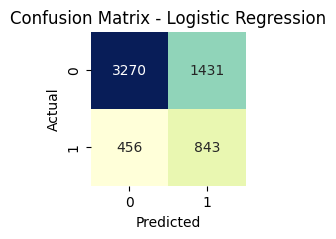

Accuracy: 0.6855
Recall: 0.648960739030023
Precision: 0.370712401055409
F1-Score: 0.471872376154492
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      4701
           1       0.37      0.65      0.47      1299

    accuracy                           0.69      6000
   macro avg       0.62      0.67      0.62      6000
weighted avg       0.77      0.69      0.71      6000



In [70]:
from sklearn.metrics import classification_report

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)



print(classification_report(y_test, y_pred))



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

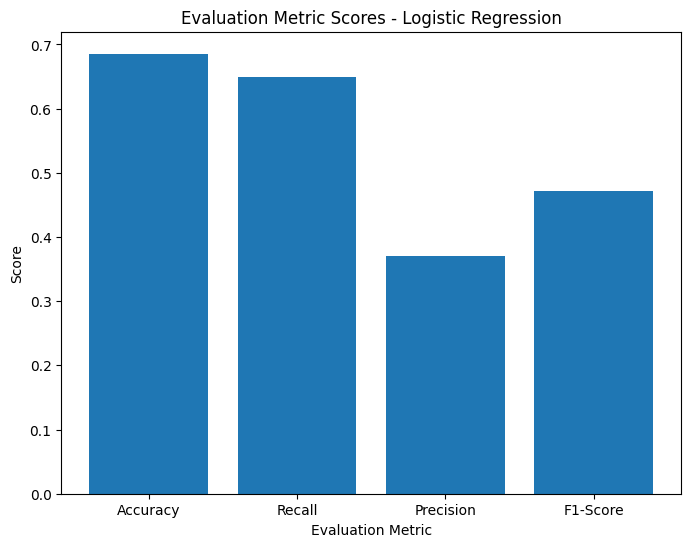

In [71]:
# Visualizing evaluation Metric Score chart

# Define the evaluation metric scores
evaluation_metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score']
scores = [accuracy, recall, precision, f1]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(evaluation_metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Scores - Logistic Regression')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [101]:

from sklearn.model_selection import GridSearchCV

param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000,10000] }

grid_lr = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 5)

# Fit the Grid search model

grid_lr.fit(X_train_smote, y_train_smote)

# Predict on the model

y_pred_logistic=grid_lr.predict(X_test_scaled)



Fitting 5 folds for each of 18 candidates, totalling 90 fits


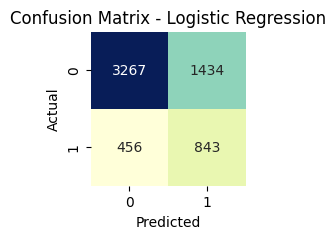

Accuracy: 0.685
Recall: 0.648960739030023
Precision: 0.3702239789196311
F1-Score: 0.471872376154492
              precision    recall  f1-score   support

           0       0.88      0.69      0.78      4701
           1       0.37      0.65      0.47      1299

    accuracy                           0.69      6000
   macro avg       0.62      0.67      0.62      6000
weighted avg       0.77      0.69      0.71      6000



In [102]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_logistic)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


accuracy = accuracy_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)



print(classification_report(y_test, y_pred_logistic))

In [103]:
grid_lr.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [104]:
lr_tuning=LogisticRegression(C=0.1,penalty='l2')

In [105]:
# Fit the Tuning model

lr_tuning.fit(X_train_smote,y_train_smote)

# Predict on the model
y_pred_tuning=lr_tuning.predict(X_test_scaled)

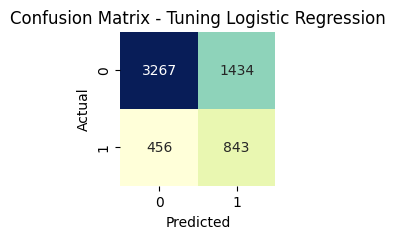

Accuracy: 0.685
Recall: 0.648960739030023
Precision: 0.3702239789196311
F1-Score: 0.47147651006711416
              precision    recall  f1-score   support

           0       0.88      0.69      0.78      4701
           1       0.37      0.65      0.47      1299

    accuracy                           0.69      6000
   macro avg       0.62      0.67      0.62      6000
weighted avg       0.77      0.69      0.71      6000



In [106]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_tuning)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuning Logistic Regression')
plt.show()


accuracy = accuracy_score(y_test, y_pred_tuning)
recall = recall_score(y_test, y_pred_tuning)
precision = precision_score(y_test, y_pred_tuning)
f1 = f1_score(y_test, y_pred_tuning)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)



print(classification_report(y_test, y_pred_tuning))

##### Which hyperparameter optimization technique have you used and why?

I Used Grid Search CV is a common and widely used hyperparameter optimization technique. It systematically searches through a predefined grid of hyperparameter combinations and evaluates each combination using cross-validation. Grid Search CV is effective for finding the optimal hyperparameters by exhaustively trying all possible combinations within the defined search space.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [78]:
# ML Model - 2 Decision Tree Classification

tree=DecisionTreeClassifier()

# Fit the Algorithm

tree.fit(X_train_smote,y_train_smote)

# Predict on the model
y_pred_decision=tree.predict(X_test_scaled)

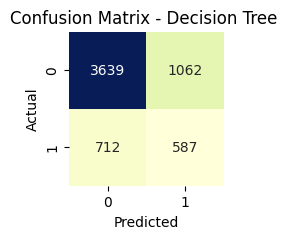

Accuracy: 0.7043333333333334
Recall: 0.4518860662047729
Precision: 0.3559733171619163
F1-Score: 0.39823609226594303


In [79]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_decision)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree ')
plt.show()



accuracy = accuracy_score(y_test, y_pred_decision)
recall = recall_score(y_test, y_pred_decision)
precision = precision_score(y_test, y_pred_decision)
f1 = f1_score(y_test, y_pred_decision)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

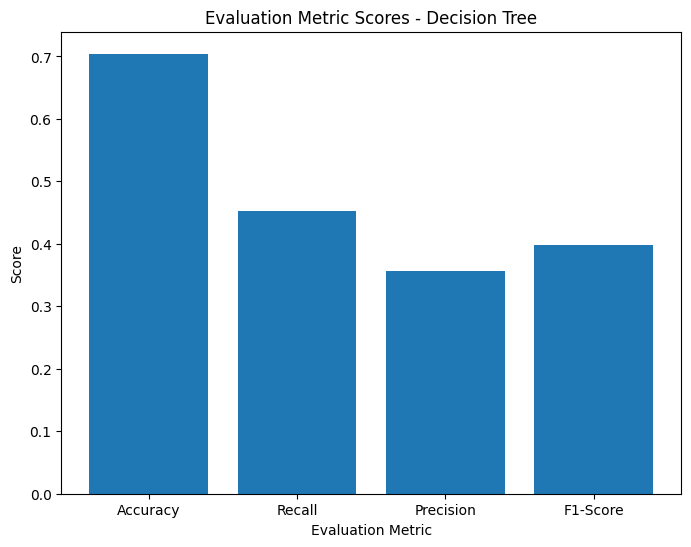

In [80]:

# Define the evaluation metric scores
evaluation_metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score']
scores = [accuracy, recall, precision, f1]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(evaluation_metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Scores - Decision Tree')
plt.show()

### ML Model - 3

In [81]:
# ML Model - 3 Random Forest

ran=RandomForestClassifier()

# Fit the Algorithm

ran.fit(X_train_smote,y_train_smote)

# Predict on the model
y_pred_random=ran.predict(X_test_scaled)

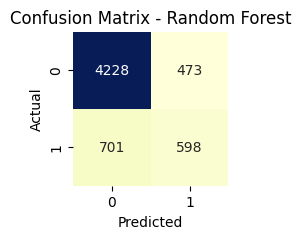

Accuracy: 0.8043333333333333
Recall: 0.4603541185527329
Precision: 0.5583566760037348
F1-Score: 0.5046413502109705
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4701
           1       0.56      0.46      0.50      1299

    accuracy                           0.80      6000
   macro avg       0.71      0.68      0.69      6000
weighted avg       0.79      0.80      0.80      6000



In [82]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_random)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()



accuracy = accuracy_score(y_test, y_pred_random)
recall = recall_score(y_test, y_pred_random)
precision = precision_score(y_test, y_pred_random)
f1 = f1_score(y_test, y_pred_random)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)

print(classification_report(y_test, y_pred_random))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

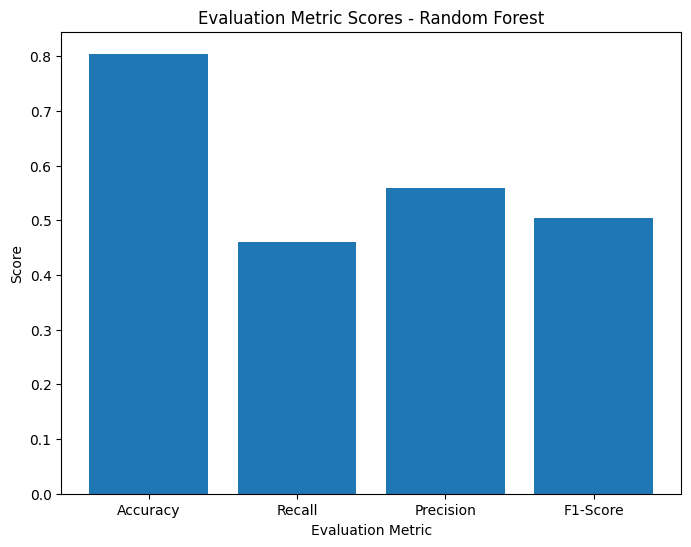

In [83]:
# Visualizing evaluation Metric Score chart

evaluation_metrics = ['Accuracy', 'Recall', 'Precision', 'F1-Score']
scores = [accuracy, recall, precision, f1]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(evaluation_metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Scores - Random Forest')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [84]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


# Instantiate the Random Forest classifier
rf = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200,],
    'max_depth': [None, 2, 3]
    
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)





In [85]:
# Fit the Grid search model

grid_search.fit(X_train_smote, y_train_smote)


# Make predictions on the test data

y_pred_ran = grid_search.predict(X_test_scaled)



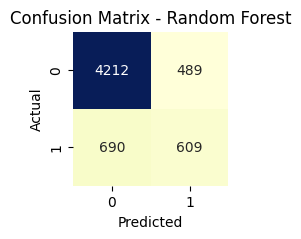

Accuracy: 0.8035
Recall: 0.46882217090069284
Precision: 0.5546448087431693
F1-Score: 0.5081351689612015
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4701
           1       0.55      0.47      0.51      1299

    accuracy                           0.80      6000
   macro avg       0.71      0.68      0.69      6000
weighted avg       0.79      0.80      0.80      6000



In [86]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_ran)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


accuracy = accuracy_score(y_test, y_pred_ran)
recall = recall_score(y_test, y_pred_ran)
precision = precision_score(y_test, y_pred_ran)
f1 = f1_score(y_test, y_pred_ran)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)



print(classification_report(y_test, y_pred_ran))

In [87]:
grid_search.best_params_

{'max_depth': None, 'n_estimators': 200}

In [88]:
rf_tuning= RandomForestClassifier(max_depth=None,n_estimators=200)


# Fit the Grid search model

rf_tuning.fit(X_train_smote, y_train_smote)


# Make predictions on the test data

y_pred_rf_tuning = rf_tuning.predict(X_test_scaled)

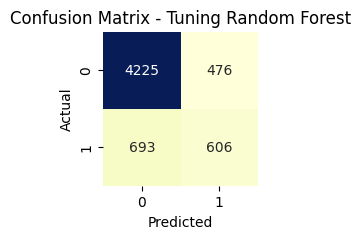

Accuracy: 0.8051666666666667
Recall: 0.4665127020785219
Precision: 0.5600739371534196
F1-Score: 0.5090298194036119
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4701
           1       0.56      0.47      0.51      1299

    accuracy                           0.81      6000
   macro avg       0.71      0.68      0.69      6000
weighted avg       0.79      0.81      0.80      6000



In [89]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_rf_tuning)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuning Random Forest')
plt.show()


accuracy = accuracy_score(y_test, y_pred_rf_tuning)
recall = recall_score(y_test, y_pred_rf_tuning)
precision = precision_score(y_test, y_pred_rf_tuning)
f1 = f1_score(y_test, y_pred_rf_tuning)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)



print(classification_report(y_test, y_pred_rf_tuning))

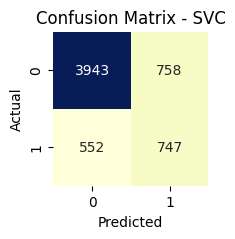

Accuracy: 0.7816666666666666
Recall: 0.5750577367205543
Precision: 0.4963455149501661
F1-Score: 0.471872376154492
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4701
           1       0.50      0.58      0.53      1299

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.79      6000



In [90]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score

# Instantiate the SVC model
svc = SVC()

# Fit the model to the training data
svc.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_svc = svc.predict(X_test_scaled)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_svc)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVC')
plt.show()


accuracy = accuracy_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)
precision = precision_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)



print(classification_report(y_test, y_pred_svc))

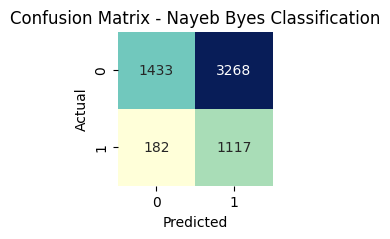

Accuracy: 0.425
Recall: 0.8598922247882987
Precision: 0.2547320410490308
F1-Score: 0.39303307529908516
              precision    recall  f1-score   support

           0       0.89      0.30      0.45      4701
           1       0.25      0.86      0.39      1299

    accuracy                           0.42      6000
   macro avg       0.57      0.58      0.42      6000
weighted avg       0.75      0.42      0.44      6000



In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score

# Instantiate the Naive Bayes model
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_nb = nb.predict(X_test_scaled)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_nb)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Nayeb Byes Classification')
plt.show()


accuracy = accuracy_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)



print(classification_report(y_test, y_pred_nb))


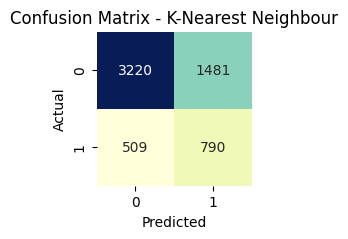

Accuracy: 0.6683333333333333
Recall: 0.6081601231716706
Precision: 0.3478643769264641
F1-Score: 0.471872376154492
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      4701
           1       0.35      0.61      0.44      1299

    accuracy                           0.67      6000
   macro avg       0.61      0.65      0.60      6000
weighted avg       0.75      0.67      0.69      6000



In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

# Instantiate the KNN model
knn = KNeighborsClassifier()

# Fit the model to the training data
knn.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test_scaled)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_knn)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbour')
plt.show()


accuracy = accuracy_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)



print(classification_report(y_test, y_pred_knn))


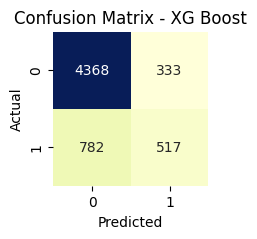

Accuracy: 0.8141666666666667
Recall: 0.39799846035411857
Precision: 0.6082352941176471
F1-Score: 0.471872376154492
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4701
           1       0.61      0.40      0.48      1299

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.80      0.81      0.80      6000



In [93]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score

# Instantiate the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_xgb)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XG Boost')
plt.show()


accuracy = accuracy_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:",precision)
print("F1-Score:",f1)



print(classification_report(y_test, y_pred_xgb))


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I used "RECALL" metrics in CreditCard Default Prediction.

The choice of using recall as an evaluation metric is relevant in the context of credit card default prediction because it places emphasis on correctly identifying the positive class (defaulters) while minimizing false negatives. In this scenario, the priority is to identify as many potential defaulters as possible to mitigate the financial risk associated with defaulting customers.

Therefore, by prioritizing recall as the evaluation metric, I am focusing on the model's ability to correctly identify defaulters and aiming to minimize the risk of overlooking potential default cases, which aligns with the goal of managing credit card default prediction effectively.








### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I choose Logistic Regression As My Final Prediction Model.

Logistic Regression was selected as the final prediction model due to several reasons. Firstly, Logistic Regression is a well-established and interpretable classification algorithm that is widely used in the field of credit card default prediction. It provides a clear understanding of the relationship between the input features and the likelihood of default.

# **Conclusion**

In our analysis, we applied various machine learning algorithms to predict credit card default. The models used were Logistic Regression, Decision Tree Classification, RandomForest Classification, Support Vector Classification, Naive Bayes, KNN, and XGBoost Classification.

After evaluating the models, we observed the following results:



| Model Name                   | Accuracy             | Recall Score |
|------------------------------|---------------------|--------------|
| 1. Logistic Regression        |       68.5%        |   64.8%     |
|          i) After Hyperparameter Tuning |   68.5%        |    64.8%      |
| 2. Decision Tree Classification          |        70.4%        |    45.1%       |
| 3. RandomForest Classification    |        80.4%        |    46.0%       |
|        i) After Hyperparameter Tuning |   80.5%        |    46.6%       |
| 4. SupportVector Classification             |        78.1%        |    57.5%     | 
| 5. Naive Bayes |   42.5%        |    85.9%     |
| 6. KNN |   66.8%        |    60.8%     |
| 7. XGB Classification |   81.4%        |    39.7%     |


From these results, we can conclude that the Logistic Regression model, after hyperparameter tuning, achieved an accuracy of 68.5% and a recall score of 64.8%. The Decision Tree Classification and RandomForest Classification models also showed reasonable accuracy scores but had relatively lower recall scores. The Support Vector Classification model performed well in terms of accuracy but had a moderate recall score. The Naive Bayes model had a low accuracy score but a high recall score, indicating a good ability to identify default cases. The KNN model showed moderate performance in both accuracy and recall. Lastly, the XGBoost Classification model achieved the highest accuracy but had a lower recall score.

Considering the importance of identifying default cases correctly, the model with a higher recall score is generally preferred. Therefore, the Naive Bayes model stands out in terms of recall score, while the Logistic Regression model provides a balanced performance in terms of both accuracy and recall.

In conclusion, the choice of the final prediction model depends on the specific requirements and priorities. If correctly identifying default cases is crucial, the Naive Bayes model may be favored due to its high recall score. However, if a balanced performance in terms of accuracy and recall is desired, the Logistic Regression model can be a suitable choice.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [94]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [95]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***